Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading Data

In [2]:
#Loading data
df = pd.read_csv('Mall_Customers.csv')

Data preprocessing

In [3]:
#Creating dataframe
df.set_index('CustomerID')
df.replace({'Male':1,'Female':0},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Visualizing dataset

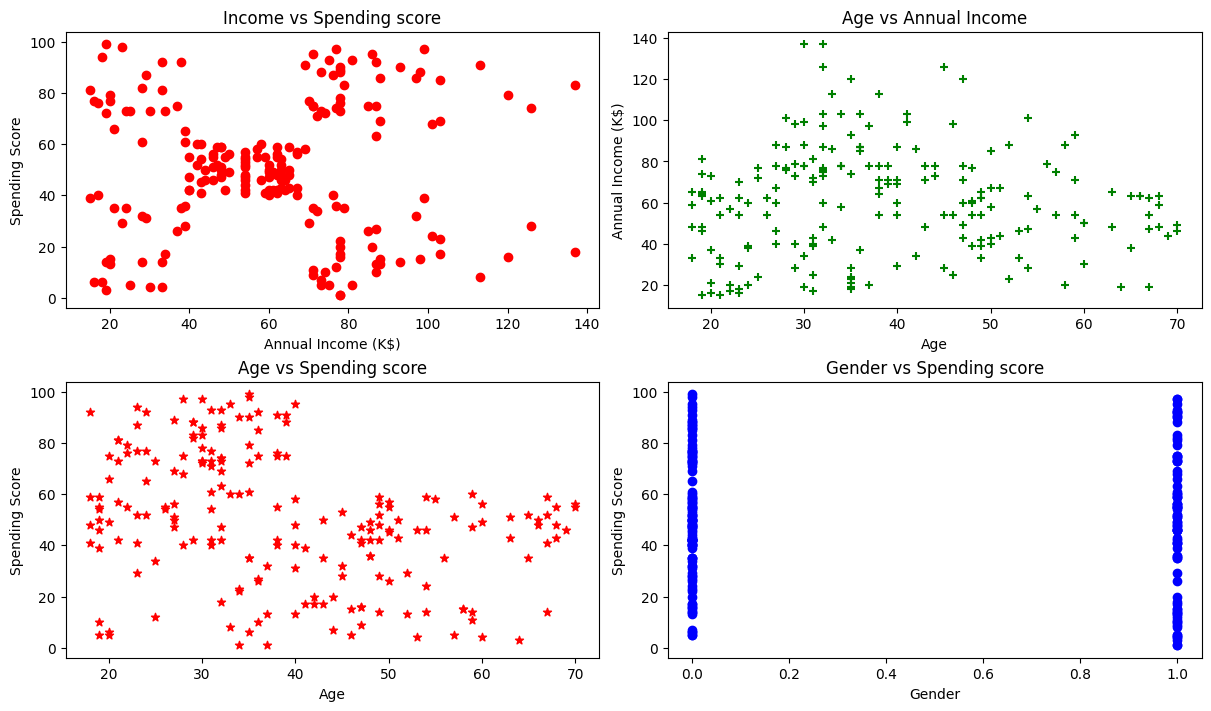

In [4]:
#Visualizing dataset:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, constrained_layout=True, figsize=(12, 7))

ax1.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],marker='o',color='red')
ax1.set_title("Income vs Spending score")
ax1.set_xlabel('Annual Income (K$)')
ax1.set_ylabel('Spending Score')

ax2.scatter(df['Age'],df['Annual Income (k$)'],marker='+',color='green')
ax2.set_title("Age vs Annual Income")
ax2.set_xlabel('Age')
ax2.set_ylabel('Annual Income (K$)')

ax3.scatter(df['Age'],df['Spending Score (1-100)'],marker='*',color='red')
ax3.set_title("Age vs Spending score")
ax3.set_xlabel('Age')
ax3.set_ylabel('Spending Score')

ax4.scatter(df['Gender'],df['Spending Score (1-100)'],color='blue')
ax4.set_title("Gender vs Spending score")
ax4.set_xlabel('Gender')
ax4.set_ylabel('Spending Score')

plt.show()


# Clustering based on Income and Spending score

In [5]:
#Clustering based on Income and Spending Score:
feature1= np.array(df['Spending Score (1-100)'])
feature2 = np.array(df['Annual Income (k$)'])

X = np.stack((feature1,feature2),axis=-1)
print(X.shape)
y = np.zeros(X.shape[0])

(200, 2)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [7]:
from sklearn.cluster import KMeans

In [8]:
#Selecting the value of K
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init='auto')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

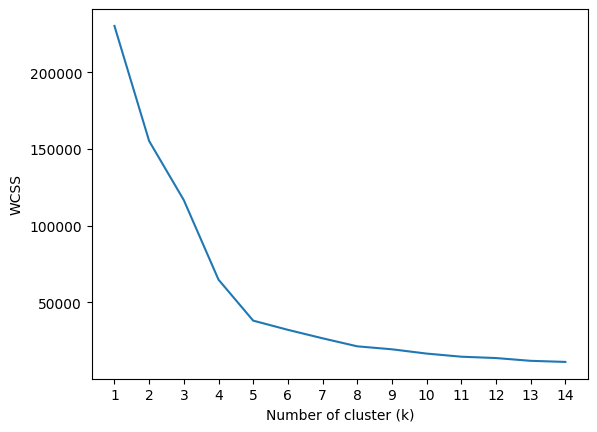

In [9]:
#Elbow curve
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel('Number of cluster (k)')
plt.ylabel('WCSS')
plt.show()

## Selecting k=5 from elbow curve

In [10]:
# choosing k = 5
kmeans = KMeans(n_clusters=5,init='k-means++',n_init='auto')
y_labels = kmeans.fit_predict(X_train)

## Plotting clusters dataset

Text(0.5, 1.0, 'Clustered customers of Train data')

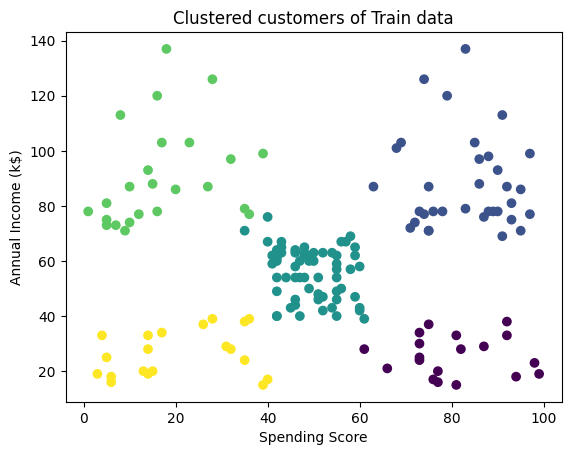

In [11]:
#Plotting clusters
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')
plt.title('Clustered customers of Train data')

In [12]:
y_test_labels = kmeans.predict(X_test)

Text(0.5, 1.0, 'Clustered customers of Test data')

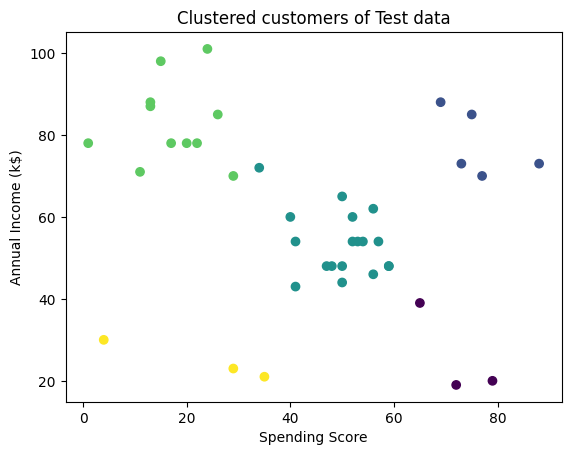

In [13]:
#Plotting clusters
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')
plt.title('Clustered customers of Test data')

In [14]:
#Finding value of k using knee locator:
from kneed import KneeLocator

## Finding k value using kneeLocator library

In [15]:
kl = KneeLocator(range(1,15),wcss,curve='convex',direction='decreasing')
kl.elbow

5

# Performance analysis

In [16]:
#Performance metrics
from sklearn.metrics import silhouette_score

In [17]:
silhouette_coefficient = []
for k in range(2,15):
        kmeans = KMeans(n_clusters=k,init='k-means++',n_init='auto')
        kmeans.fit(X_train)
        score = silhouette_score(X_train,kmeans.labels_)
        silhouette_coefficient.append(score)
    

# Plotting Silhouette coefficient

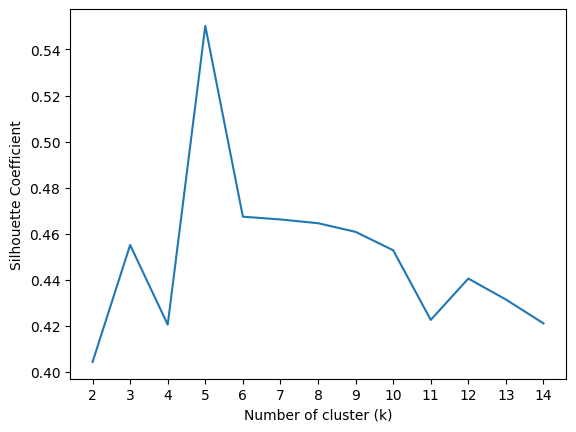

In [18]:
#Plotting Silhouette coefficient
plt.plot(range(2,15),silhouette_coefficient)
plt.xticks(range(2,15))
plt.xlabel('Number of cluster (k)')
plt.ylabel('Silhouette Coefficient')
plt.show()

## Here as k=5 has highest coeffcients, it is the correct choice

# Again, Clustering Age vs Spending score

In [19]:
#Clustering Age vs AnnualIncome 
feature3 = np.array(df['Age'])
X = np.stack((feature1,feature3),axis=-1)
print(X.shape)
y = np.zeros(X.shape[0])

(200, 2)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [21]:
#Selecting the value of K
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init='auto')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

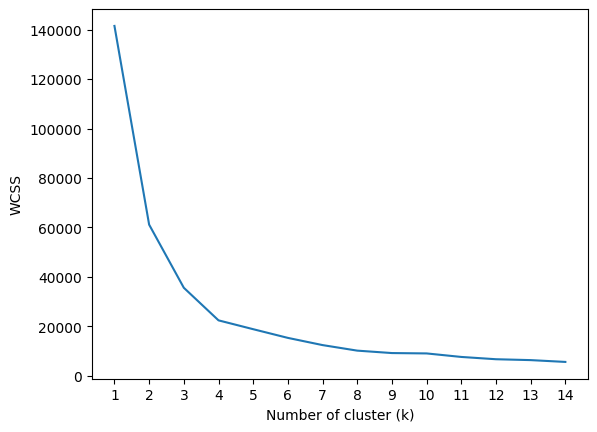

In [22]:
#Elbow curve
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel('Number of cluster (k)')
plt.ylabel('WCSS')
plt.show()

In [23]:
#Using KneeLocator, finding value of k:
kl = KneeLocator(range(1,15),wcss,curve='convex',direction='decreasing')
kl.elbow

4

In [24]:
# choosing k = 4
kmeans = KMeans(n_clusters=4,init='k-means++',n_init='auto')
y_labels = kmeans.fit_predict(X_train)

Text(0.5, 1.0, 'Clustered customers of Train data')

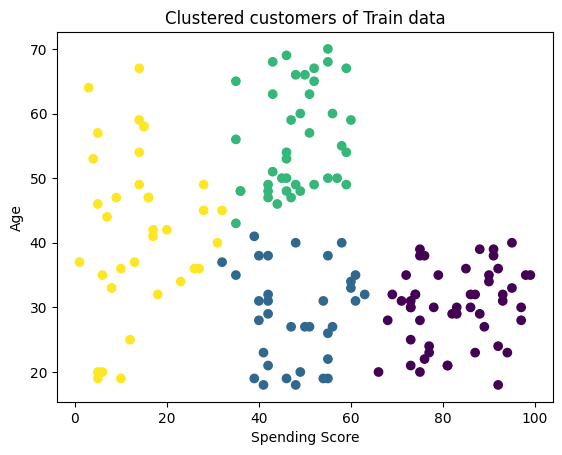

In [25]:
#Plotting clusters
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.title('Clustered customers of Train data')

Text(0.5, 1.0, 'Clustered customers of Test data')

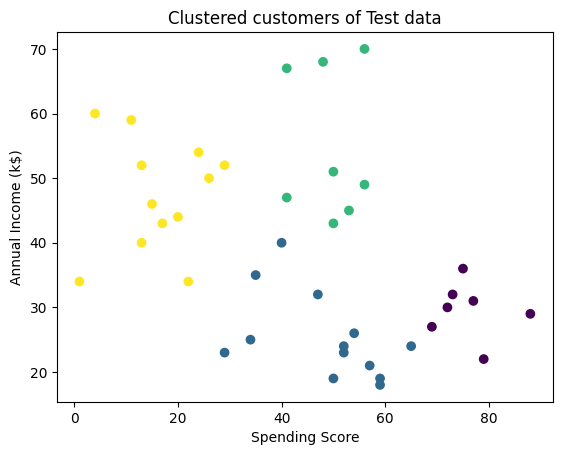

In [26]:
y_test_labels = kmeans.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')
plt.title('Clustered customers of Test data')

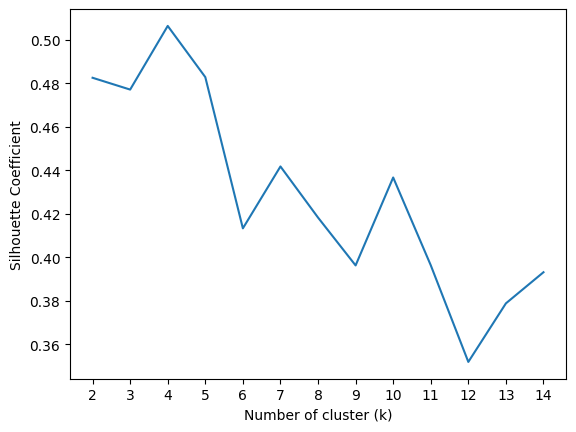

In [27]:
silhouette_coefficient = []
for k in range(2,15):
        kmeans = KMeans(n_clusters=k,init='k-means++',n_init='auto')
        kmeans.fit(X_train)
        score = silhouette_score(X_train,kmeans.labels_)
        silhouette_coefficient.append(score)
#Plotting Silhouette coefficient
plt.plot(range(2,15),silhouette_coefficient)
plt.xticks(range(2,15))
plt.xlabel('Number of cluster (k)')
plt.ylabel('Silhouette Coefficient')
plt.show()

## In conclusion, Here k- means clustering algorithm is used from sklearn library to cluster the customer on a retail store.